In [1]:
# External imports
import os
import pretty_midi
import numpy as np
import tensorflow as tf
#!apt install libsndfile-dev
#import note_seq
#import IPython
import matplotlib.pyplot as plt
%matplotlib inline
# Internal imports
from data.helpers.midi import MidiEventProcessor
from models.midi_transformer import MIDITransformer

## Required file paths and common variables

In [2]:
# File paths for local computer
# ------------------------------------------------------------------------------------
BASE_DIR = "/home/richhiey/Desktop/workspace/projects/virtual_musicians"
DATA_DIR = os.path.join(BASE_DIR, "data", "POP909-Dataset", "POP909")
MIDI_EVENTS_PATH = os.path.join(BASE_DIR, "data", "preprocessed",  "pop909-event-token.npy")
DATASET_PATH = os.path.join(BASE_DIR, "data", "preprocessed",  "pop909.tfrecords")
MODEL_SAVE_PATH = os.path.join(BASE_DIR, "cache", 'checkpoints', 'model00')
MODEL_CONFIG_PATH = os.path.join(BASE_DIR, 'model-store', 'models', 'configs', 'default.json')

## File paths for GPU Container
# ------------------------------------------------------------------------------------
#BASE_DIR          = "/home/rithomas"
#PROJECT_DIR       = os.path.join(BASE_DIR, "project")
#DATA_DIR          = os.path.join(BASE_DIR, "data", "POP909-Dataset", "POP909")
#MIDI_EVENTS_PATH  = os.path.join(BASE_DIR, "data", "preprocessed",  "pop909-event-token.npy")
#DATASET_PATH      = os.path.join(BASE_DIR, "cache", "preprocessed",  "pop909.tfrecords")
#MODEL_SAVE_PATH   = os.path.join(BASE_DIR, "cache", 'checkpoints', 'xl-decoder_13')#
#MODEL_CONFIG_PATH = os.path.join(PROJECT_DIR, 'model-store', 'models', 'configs', 'default.json')

# Common variables
# ------------------------------------------------------------------------------------
feature_description = {
    'melody': tf.io.VarLenFeature(tf.int64),
    'rhythm': tf.io.VarLenFeature(tf.int64),
    'bridge': tf.io.VarLenFeature(tf.int64)
}
BATCH_SIZE = 2

## Loading POP909 MIDI Dataset

In [3]:
pop909 = np.load(MIDI_EVENTS_PATH, allow_pickle=True)
print(np.shape(pop909))

melodies = [song['MELODY'] for song in pop909]
rhythms = [song['PIANO'] for song in pop909]
bridges = [song['BRIDGE'] for song in pop909]

if not os.path.exists(DATASET_PATH):
    with tf.io.TFRecordWriter(DATASET_PATH) as file_writer:
        for melody, rhythm, bridge in zip(melodies, rhythms, bridges):
            example = tf.train.Example(
                features=tf.train.Features(
                    feature={
                        "melody": tf.train.Feature(int64_list=tf.train.Int64List(value=[389]+melody+[390])),
                        "rhythm": tf.train.Feature(int64_list=tf.train.Int64List(value=[389]+rhythm+[390])),
                        "bridge": tf.train.Feature(int64_list=tf.train.Int64List(value=[389]+bridge+[390]))
                    }
                )
            )
            file_writer.write(example.SerializeToString())
        file_writer.close()


def _parse_function(example_proto):
    return tf.io.parse_single_example(example_proto, feature_description)

raw_dataset = tf.data.TFRecordDataset(DATASET_PATH)
dataset = raw_dataset.map(_parse_function).batch(BATCH_SIZE, drop_remainder=True).repeat(1000)
event_processor = MidiEventProcessor()
piano = pretty_midi.instrument_name_to_program('Acoustic Grand Piano')

# Reconstruct MIDI data from TFRecord
#for i, data in enumerate(dataset.take(3)):
#    print('----------------------------------------------------------')
#    full_midi = pretty_midi.PrettyMIDI()
    
#    melody_instr = pretty_midi.Instrument(program=piano)
#    rhythm_instr = pretty_midi.Instrument(program=piano)
#    bridge_instr = pretty_midi.Instrument(program=piano)
    
#    print('Melody:')
#    melody_events = tf.sparse.to_dense(data['melody']).numpy()
#    print(melody_events)
#    for note in event_processor.decode(melody_events):
#        melody_instr.notes.append(note)
    
#    print('Rhythm:')
#    rhythm_events = tf.sparse.to_dense(data['rhythm']).numpy()
#    print(rhythm_events)
#    for note in event_processor.decode(rhythm_events):
#        rhythm_instr.notes.append(note)
    
#    print('Bridge:')
#    bridge_events = tf.sparse.to_dense(data['bridge']).numpy()
#    print(bridge_events)
#    for note in event_processor.decode(bridge_events):
#        bridge_instr.notes.append(note)
    
#    full_midi.instruments.append(melody_instr)
#    full_midi.instruments.append(rhythm_instr)
#    full_midi.instruments.append(bridge_instr)
#    IPython.display.display(IPython.display.Audio(full_midi.fluidsynth(), rate=44100))
#    filename = 'test_'+str(i)+'.mid'
#    full_midi.write(filename)
    
#    full_midi_ns = note_seq.midi_io.midi_file_to_note_sequence(filename)
#    note_seq.plot_sequence(full_midi_ns)
#    break

(909,)


## Train Transformer XL Model

0it [00:00, ?it/s]

RestoredDECODERfrom /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-15
<RepeatDataset shapes: {bridge: (2, None), melody: (2, None), rhythm: (2, None)}, types: {bridge: tf.int64, melody: tf.int64, rhythm: tf.int64}>
Training the encoder on key: melody
Training the encoder on key: melody
Instructions for updating:
`inputs` is now automatically inferred
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Lets see to what to the model sounds like step 0!
----------------------------------------------------------
TARGETS:


/home/richhiey/.local/lib/python3.8/site-packages/librosa/display.py:1154: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  warnings.warn(
/home/richhiey/.local/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


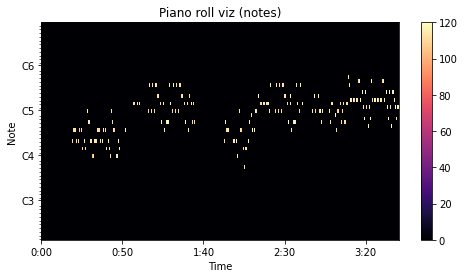

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:


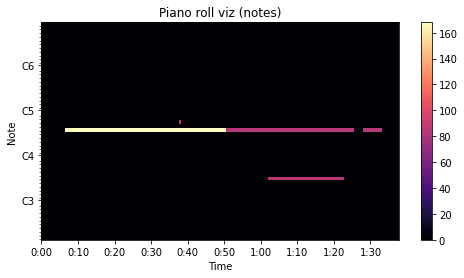

1it [00:10, 10.57s/it]

Done reconstructing events into Piano Roll!
Loss (0) - tf.Tensor(5.9685035, shape=(), dtype=float32)
Saved checkpoint for step 301: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-16


100it [02:40,  1.59s/it]

Lets see to what to the model sounds like step 100!
----------------------------------------------------------
TARGETS:


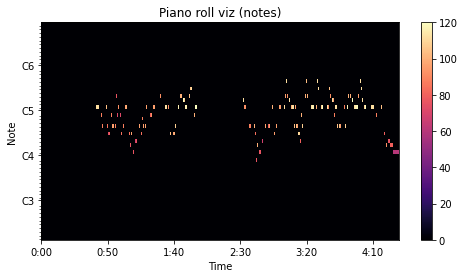

101it [02:44,  2.32s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (100) - tf.Tensor(5.9279037, shape=(), dtype=float32)
Saved checkpoint for step 401: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-17


200it [05:16,  1.53s/it]

Lets see to what to the model sounds like step 200!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

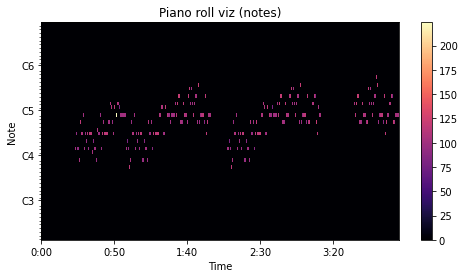

201it [05:20,  2.15s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (200) - tf.Tensor(5.9053555, shape=(), dtype=float32)
Saved checkpoint for step 501: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-18


300it [07:44,  1.50s/it]

Lets see to what to the model sounds like step 300!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

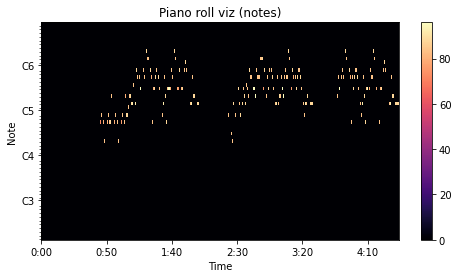

301it [07:47,  2.21s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (300) - tf.Tensor(5.877791, shape=(), dtype=float32)
Saved checkpoint for step 601: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-19


400it [10:23,  1.68s/it]

Lets see to what to the model sounds like step 400!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

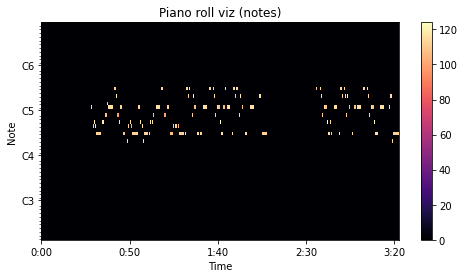

401it [10:27,  2.28s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (400) - tf.Tensor(5.8699803, shape=(), dtype=float32)
Saved checkpoint for step 701: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-20


500it [13:30,  2.54s/it]

Lets see to what to the model sounds like step 500!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

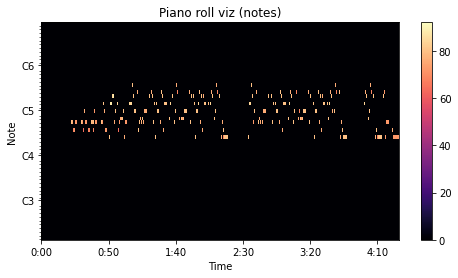

501it [13:35,  3.17s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (500) - tf.Tensor(5.9078, shape=(), dtype=float32)
Saved checkpoint for step 801: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-21


600it [16:30,  1.35s/it]

Lets see to what to the model sounds like step 600!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

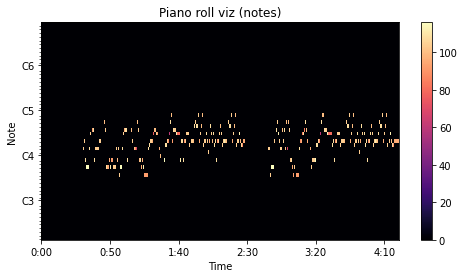

601it [16:34,  2.15s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (600) - tf.Tensor(5.8819394, shape=(), dtype=float32)
Saved checkpoint for step 901: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-22


700it [19:23,  1.65s/it]

Lets see to what to the model sounds like step 700!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

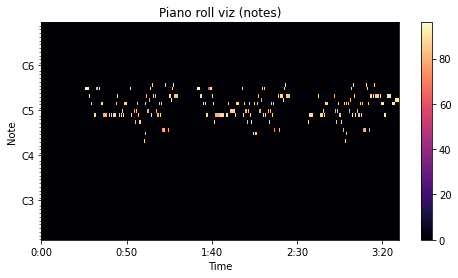

701it [19:27,  2.25s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (700) - tf.Tensor(5.8513675, shape=(), dtype=float32)
Saved checkpoint for step 1001: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-23


800it [22:08,  1.56s/it]

Lets see to what to the model sounds like step 800!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

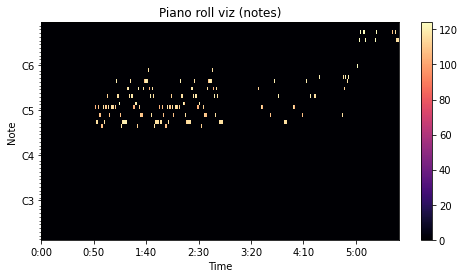

801it [22:13,  2.62s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (800) - tf.Tensor(5.8526645, shape=(), dtype=float32)
Saved checkpoint for step 1101: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-24


900it [25:43,  1.67s/it]

Lets see to what to the model sounds like step 900!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

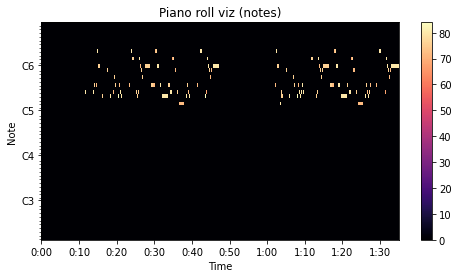

901it [25:46,  2.11s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (900) - tf.Tensor(5.9146934, shape=(), dtype=float32)
Saved checkpoint for step 1201: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-25


1000it [28:58,  1.77s/it]

Lets see to what to the model sounds like step 1000!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

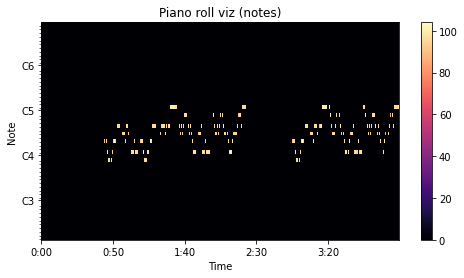

1001it [29:02,  2.43s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1000) - tf.Tensor(5.884546, shape=(), dtype=float32)
Saved checkpoint for step 1301: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-26


1100it [31:37,  1.47s/it]

Lets see to what to the model sounds like step 1100!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

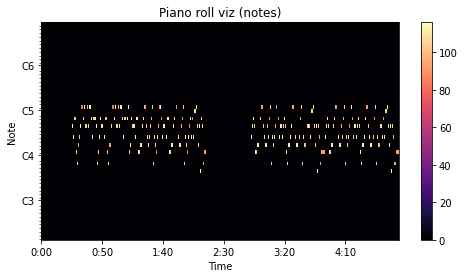

1101it [31:42,  2.28s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1100) - tf.Tensor(5.8703413, shape=(), dtype=float32)
Saved checkpoint for step 1401: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-27


1200it [34:09,  1.48s/it]

Lets see to what to the model sounds like step 1200!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

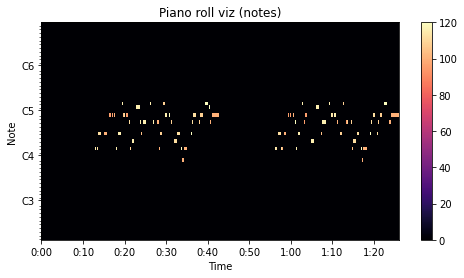

1201it [34:11,  1.76s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1200) - tf.Tensor(5.8431883, shape=(), dtype=float32)
Saved checkpoint for step 1501: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-28


1300it [36:53,  1.75s/it]

Lets see to what to the model sounds like step 1300!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

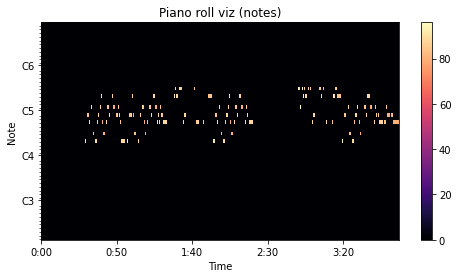

1301it [36:57,  2.58s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1300) - tf.Tensor(5.863296, shape=(), dtype=float32)
Saved checkpoint for step 1601: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-29


1400it [39:35,  1.43s/it]

Lets see to what to the model sounds like step 1400!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

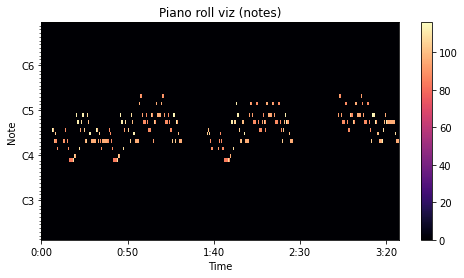

1401it [39:39,  1.96s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1400) - tf.Tensor(5.8140774, shape=(), dtype=float32)
Saved checkpoint for step 1701: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-30


1500it [42:06,  1.40s/it]

Lets see to what to the model sounds like step 1500!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

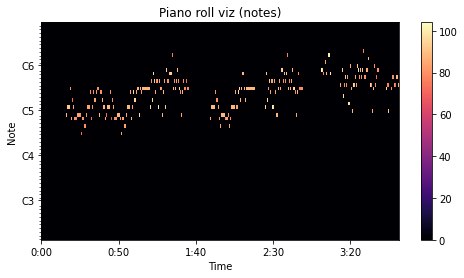

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1500) - tf.Tensor(5.857958, shape=(), dtype=float32)


1501it [42:09,  2.05s/it]

Saved checkpoint for step 1801: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-31


1600it [44:57,  1.56s/it]

Lets see to what to the model sounds like step 1600!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

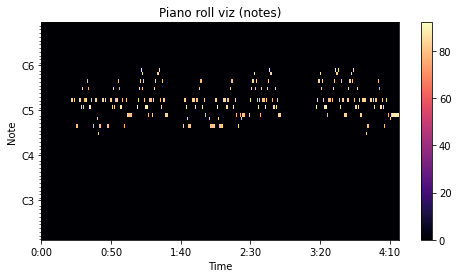

1601it [45:01,  2.34s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1600) - tf.Tensor(5.8889785, shape=(), dtype=float32)
Saved checkpoint for step 1901: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-32


1700it [47:47,  1.55s/it]

Lets see to what to the model sounds like step 1700!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

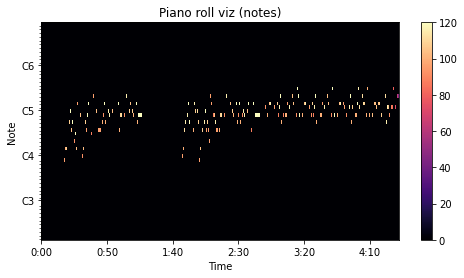

1701it [47:52,  2.75s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1700) - tf.Tensor(5.8855467, shape=(), dtype=float32)
Saved checkpoint for step 2001: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-33


1800it [50:55,  2.16s/it]

Lets see to what to the model sounds like step 1800!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

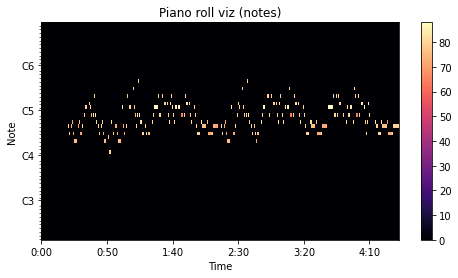

1801it [50:59,  2.96s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1800) - tf.Tensor(5.8891444, shape=(), dtype=float32)
Saved checkpoint for step 2101: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-34


1900it [53:27,  1.37s/it]

Lets see to what to the model sounds like step 1900!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

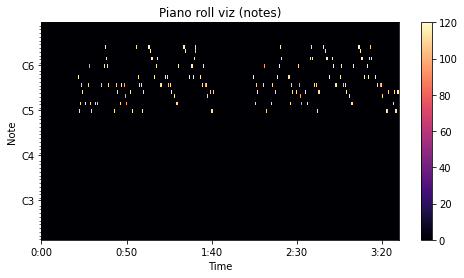

1901it [53:31,  1.95s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (1900) - tf.Tensor(5.856731, shape=(), dtype=float32)
Saved checkpoint for step 2201: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-35


2000it [55:59,  1.47s/it]

Lets see to what to the model sounds like step 2000!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

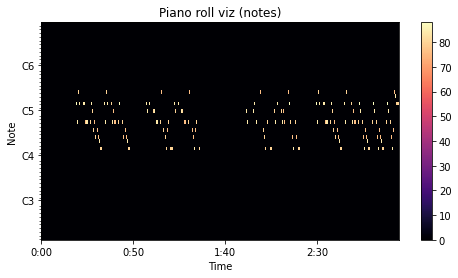

2001it [56:03,  2.08s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2000) - tf.Tensor(5.84157, shape=(), dtype=float32)
Saved checkpoint for step 2301: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-36


2100it [58:21,  1.32s/it]

Lets see to what to the model sounds like step 2100!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

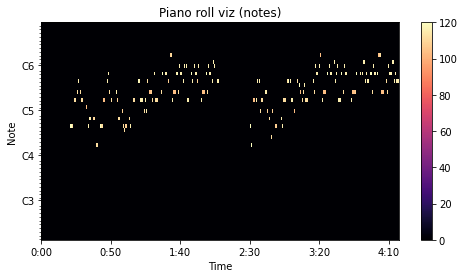

2101it [58:25,  1.96s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2100) - tf.Tensor(5.858228, shape=(), dtype=float32)
Saved checkpoint for step 2401: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-37


2200it [1:00:42,  1.62s/it]

Lets see to what to the model sounds like step 2200!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

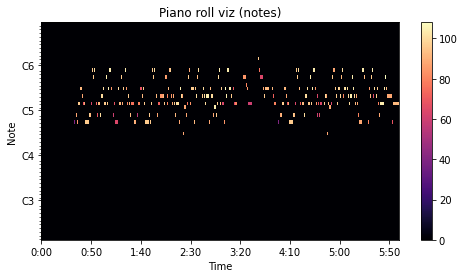

2201it [1:00:46,  2.50s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2200) - tf.Tensor(5.861059, shape=(), dtype=float32)
Saved checkpoint for step 2501: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-38


2300it [1:03:06,  1.35s/it]

Lets see to what to the model sounds like step 2300!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

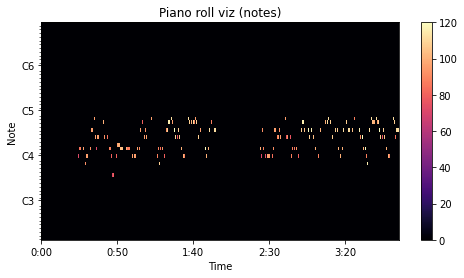

2301it [1:03:10,  2.08s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2300) - tf.Tensor(5.873732, shape=(), dtype=float32)
Saved checkpoint for step 2601: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-39


2400it [1:05:29,  1.29s/it]

Lets see to what to the model sounds like step 2400!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

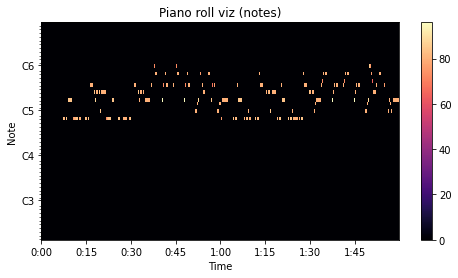

2401it [1:05:31,  1.66s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2400) - tf.Tensor(5.8312187, shape=(), dtype=float32)
Saved checkpoint for step 2701: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-40


2500it [1:07:51,  1.35s/it]

Lets see to what to the model sounds like step 2500!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

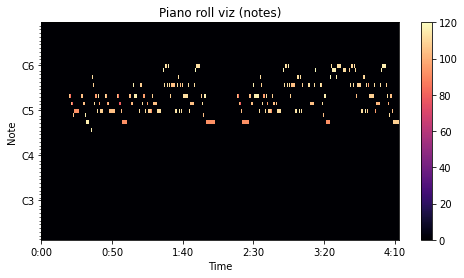

2501it [1:07:54,  1.92s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2500) - tf.Tensor(5.803706, shape=(), dtype=float32)
Saved checkpoint for step 2801: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-41


2600it [1:10:11,  1.42s/it]

Lets see to what to the model sounds like step 2600!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

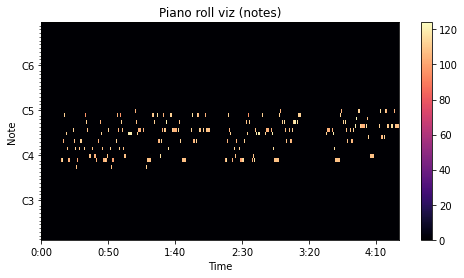

2601it [1:10:14,  2.11s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2600) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 2901: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-42


2700it [1:12:35,  1.41s/it]

Lets see to what to the model sounds like step 2700!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

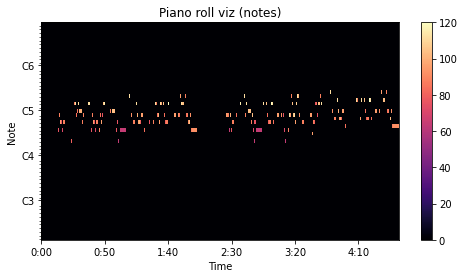

2701it [1:12:39,  2.23s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2700) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 3001: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-43


2800it [1:14:58,  1.40s/it]

Lets see to what to the model sounds like step 2800!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

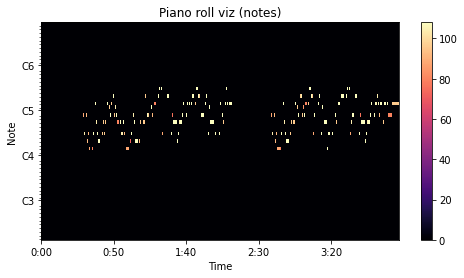

2801it [1:15:01,  2.14s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2800) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 3101: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-44


2900it [1:17:24,  1.39s/it]

Lets see to what to the model sounds like step 2900!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

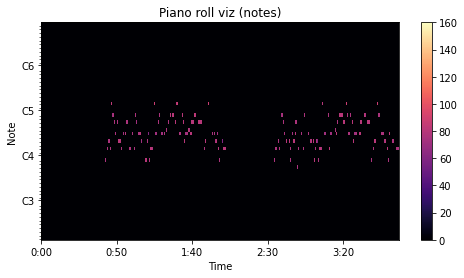

2901it [1:17:28,  2.06s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (2900) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 3201: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-45


3000it [1:19:46,  1.34s/it]

Lets see to what to the model sounds like step 3000!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

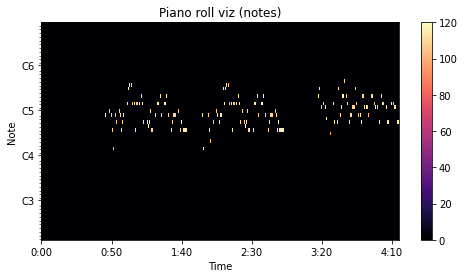

3001it [1:19:49,  2.03s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (3000) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 3301: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-46


3100it [1:22:05,  1.36s/it]

Lets see to what to the model sounds like step 3100!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

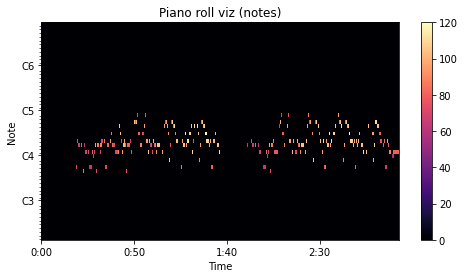

3101it [1:22:08,  1.82s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (3100) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 3401: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-47


3200it [1:24:29,  1.29s/it]

Lets see to what to the model sounds like step 3200!
----------------------------------------------------------
TARGETS:


<Figure size 576x288 with 0 Axes>

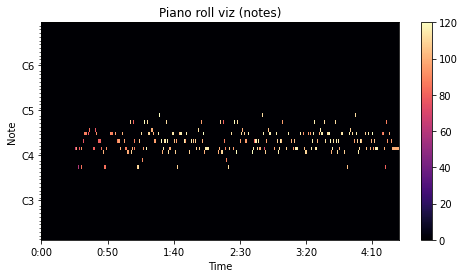

3201it [1:24:33,  2.16s/it]

Done reconstructing events into Piano Roll!
----------------------------------------------------------
OUTPUTS:
OUTPUTS seem to not be well formed. Lets skip and proceed ..
Loss (3200) - tf.Tensor(nan, shape=(), dtype=float32)
Saved checkpoint for step 3501: /home/richhiey/Desktop/workspace/projects/virtual_musicians/cache/checkpoints/model00/ckpt/decoder/ckpt-48


3212it [1:24:58,  1.59s/it]


KeyboardInterrupt: 

<Figure size 576x288 with 0 Axes>

In [4]:
midi_transformer = MIDITransformer(MODEL_CONFIG_PATH, MODEL_SAVE_PATH)
midi_transformer.reset_states()
event_processor = MidiEventProcessor()

print(midi_transformer)
print(dataset)
midi_transformer.train(dataset, event_processor, {'inputs': 'melody', 'outputs': 'melody', 'num_epochs': '1000'})

## Create new Note Sequences with the MIDI Transformer

In [ ]:
#midi_transformer.predict(midi_note_sequence)